<a href="https://colab.research.google.com/github/Derevenitckaia/Digital_Image_Processing/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Лабораторная работа No2: Синтезирование изображений**
Цель работы – приобретение навыков синтезирования цифровых изображений, генерации шума различной природы возникновения. Использование базовых арифметических и геометрических операций над цифровым изображением.


In [68]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import plotly.express as px

1. Синтезировать пустое полутоновое 8-битное изображение размером 800×800 пикселей.

In [72]:
img = np.ones([800, 800], dtype=np.uint8)

2. Нанести на изображение шум в соответствии с вариантом индивидуального задания по известному закону распределения (Гауссов шум).

In [80]:
mean = 0
sigma = 1
gauss = np.random.normal(mean,sigma,img.shape)
# gauss = gauss.astype(np.uint8)
noisy_img = img + gauss

3. Построить гистограмму распределения полученного изображения шума.

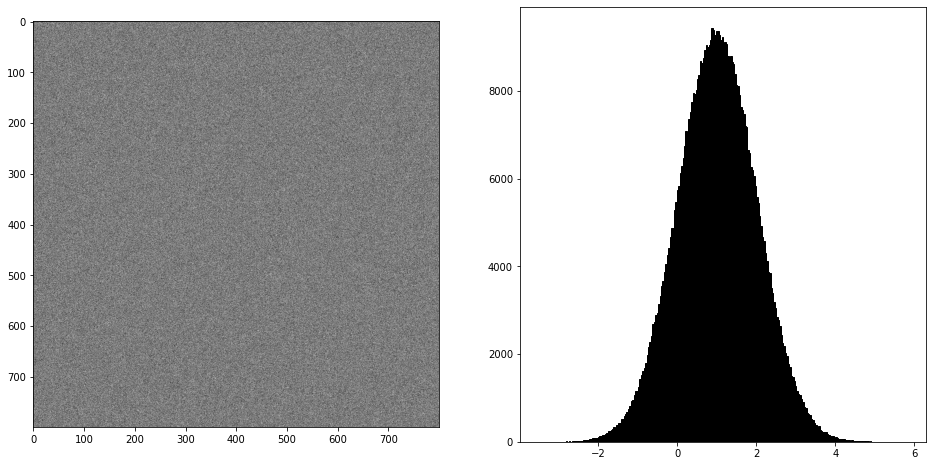

In [81]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(noisy_img, cmap='gray')
plt.subplot(1, 2, 2)
plt.hist( noisy_img.ravel(), bins=256, fc='k', ec='k')
plt.show()

4. Синтезировать изображение Объекта 1 в соответствии с вариантом индивидуального задания в центре изображения

In [82]:
obj1 = np.zeros([800, 800])
obj1_linear = np.zeros([400, 400], dtype=np.uint8)
obj1_nearest = np.zeros([400, 400], dtype=np.uint8)
obj1[:, :] = 255
for i in range(0, 800):
  for j in range(0, 800):
    if i > 350 and i < 450 and j > 200 and j < 600:
      obj1[i, j] = 0

5. Выполнить масштабирование изображение, увеличив и уменьшив размер синтезированного объекта в 2 раза разными методами (ближайшего соседа, билинейной или бикубической интерполяции).

Уменьшение в 2 раза методом билинейной интерполяции:

In [83]:

for y in range(0, 800, 2):
  for x in range(0, 800, 2):
    new_x = int(x/2)
    new_y = int(y/2)
    if y == 0:
      obj1_linear[new_x, new_y]  = int(1/2*(obj1[x+1, y+1]  + obj1[x-1, y+1] ))
    elif x == 0:
      obj1_linear[new_x, new_y] = int(1/2*(obj1[x+1, y+1]  + obj1[x+1, y-1] ))
    else:
      obj1_linear[new_x, new_y] = int(1/4*(obj1[x+1, y+1]  + obj1[x-1, y+1] + obj1[x+1, y-1] + obj1[x-1, y-1] ))

# obj1_nearest = cv2.resize(obj1, (400, 400), interpolation = cv2.INTER_LINEAR)
# obj1_cubic = cv2.resize(obj1, (400, 400), interpolation = cv2.INTER_CUBIC)

Уменьшение в 2 раза с интерполяцией методом ближайшего соседа:

In [ ]:
for y in range(0, 800, 2):
  for x in range(0, 800, 2):
    new_x = int(x/2)
    new_y = int(y/2)
    obj1_nearest[new_x, new_y]  = obj1[x, y]

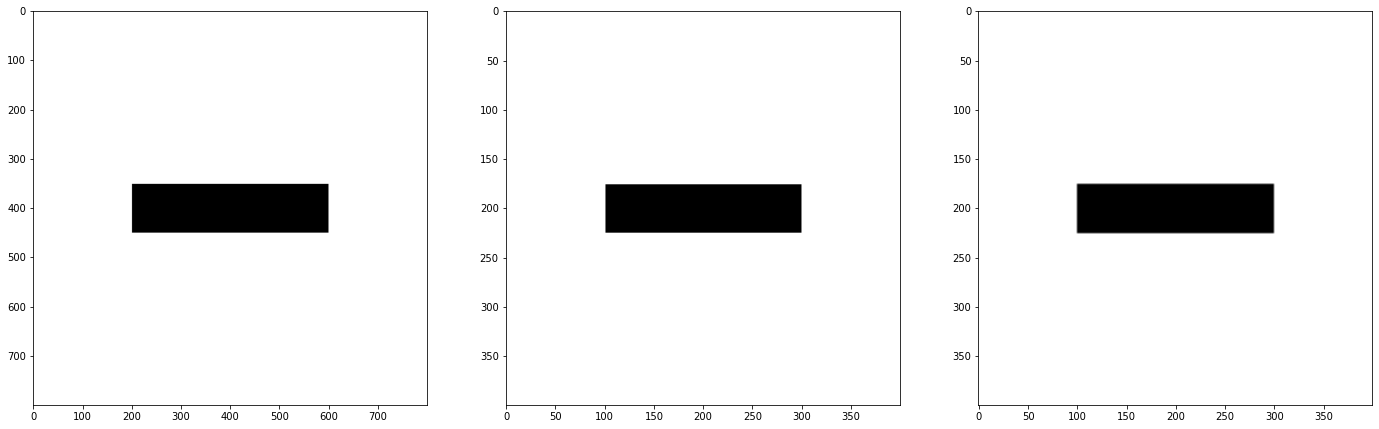

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24, 8))
plt.subplot(1, 3, 1)
plt.imshow(obj1, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(obj1_nearest, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(obj1_linear, cmap='gray')
plt.show()

In [51]:
obj1 = np.zeros([800, 800])
obj1_linear = np.zeros([1600, 1600], dtype=np.uint8)
obj1_nearest = np.zeros([1600, 1600], dtype=np.uint8)
obj1[:, :] = 255
for i in range(0, 800):
  for j in range(0, 800):
    if i > 350 and i < 450 and j > 200 and j < 600:
      obj1[i, j] = 0

Увеличение в 2 раза методом билинейной интерполяции:

In [52]:
for y in range(0, 1600):
  for x in range(0, 1600):
    new_x = int(x/2)
    new_y = int(y/2)
    if new_y == 799:
      obj1_linear[x, y]  = int(1/2*(obj1[new_x, new_y]  + obj1[new_x-1, new_y] ))
    elif new_x == 799:
      obj1_linear[x, y] = int(1/2*(obj1[new_x, new_y]  + obj1[new_x, new_y-1] ))
    else:
      obj1_linear[x, y] = int(1/4*(obj1[new_x, new_y]  + obj1[new_x, new_y+1] + obj1[new_x+1, new_y] + obj1[new_x+1, new_y+1] ))


Увелечение в 2 раза с интеерполяциией методом ближайшего соседа:

In [ ]:
for y in range(0, 1600):
  for x in range(0, 1600):
    new_x = int(x/2)
    new_y = int(y/2)
    obj1_nearest[x, y]  = obj1[new_x, new_y]

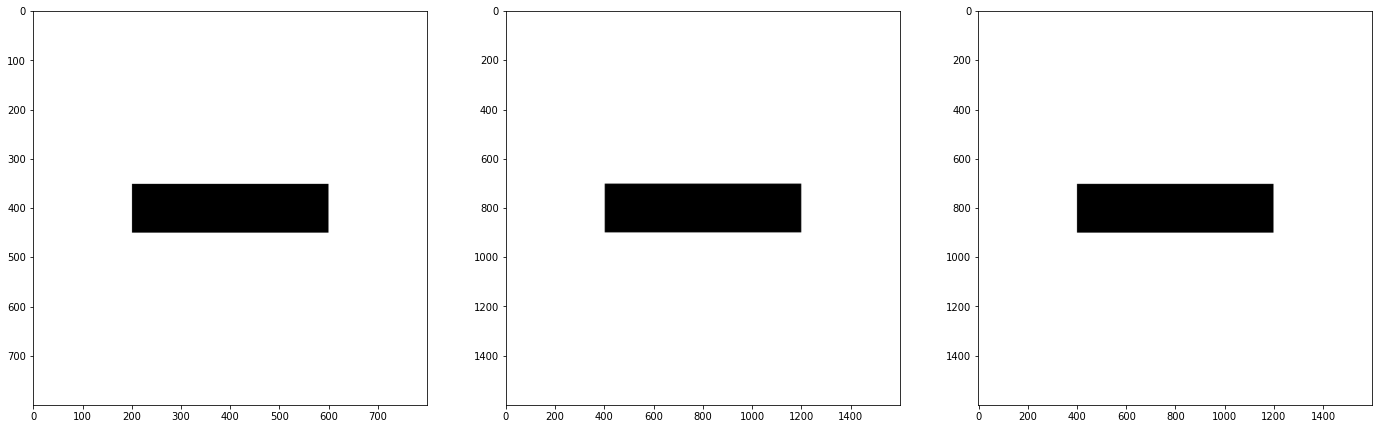

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24, 8))
plt.subplot(1, 3, 1)
plt.imshow(obj1, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(obj1_linear, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(obj1_nearest, cmap='gray')
plt.show()

6. Синтезировать новое изображение с шумом и нанести объекты 2 и 3 в соответствии с вариантом индивидуального задания. Объекты должны располагаться в верхнем левом и нижнем правом углах синтезированного изображения

In [54]:
obj2 = np.zeros([800, 800], dtype=np.uint8)
obj2_mir_hor = np.zeros([800, 800], dtype=np.uint8)
obj2_mir_ver = np.zeros([800, 800], dtype=np.uint8)
obj2_rot1 = np.zeros([800, 800], dtype=np.uint8)
obj2_rot2 = np.zeros([800, 800], dtype=np.uint8)
obj2[:, :] = 255


r = 100
for i in range(0, 800):
  for j in range(0, 800):
    if np.power(i- 650, 2) + np.power(j - 650, 2) < r**2:
      obj2[i, j] = 0

line_width = 5
obj2[200:200+line_width, 100:300] = 0
obj2[100:200+line_width, 300:300+line_width] = 0
for i in range(0, 800):
  for j in range(0, 800):
    if -0.5*j + 250 < i and -0.5*j + 255 > i:
      obj2[i, j] = 0
obj2[:, 305:500] = 255
obj2[:, 0:105] = 255

obj3 = obj2 %  для последнего задания
obj2 = obj2 + gauss 
obj2 = np.array(obj2, dtype=np.uint8)



7. Выполнить операцию зеркального отражения по горизонтали.
8. Выполнить операцию зеркального отражения по вертикали.

In [55]:
for i in range(0, 800):
  for j in range(0, 800):
    obj2_mir_hor[i, j] = obj2[799-i,j]
    obj2_mir_ver[i, j] = obj2[i, 799-j]

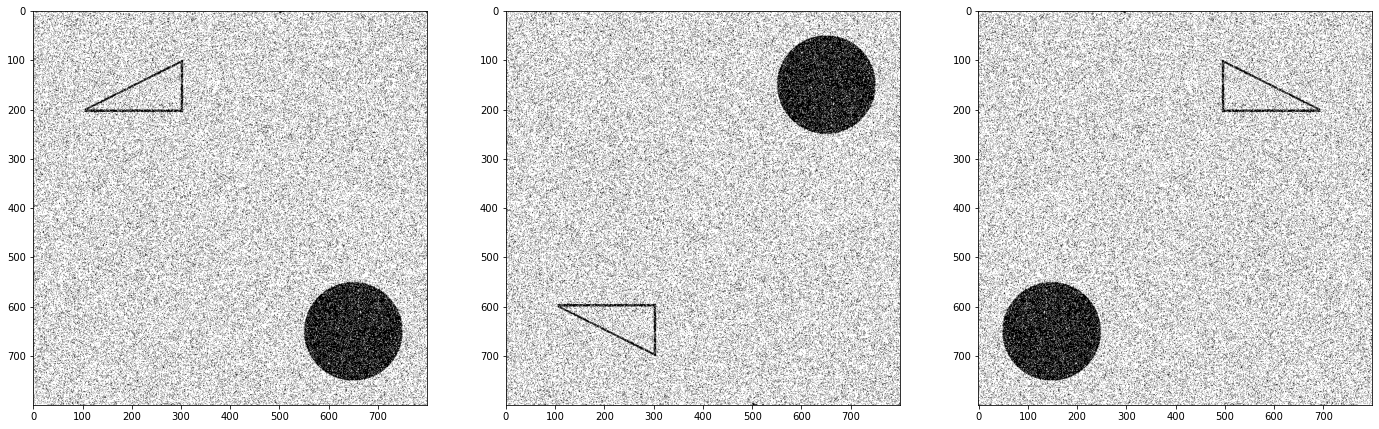

In [56]:

plt.figure(figsize=(24, 8))
plt.subplot(1, 3, 1)
plt.imshow(obj2, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(obj2_mir_hor, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(obj2_mir_ver, cmap='gray')
plt.show()

9. Выполнить операцию поворота изображения по часовой стрелке на 45°.
10. Выполнить операцию поворота изображения против часовой стрелке на 45°.




In [58]:
angle = np.pi/4
rotation_matrix1 = np.array(
        [
            [np.cos(angle), -np.sin(angle), 0], 
            [np.sin(angle),  np.cos(angle), 0],
            [0,0, 1] 
            
        ])
center_matrix1 = np.array(
        [
            [np.cos(angle), -np.sin(angle), -400*np.cos(angle)+400*np.sin(angle)+400], 
            [np.sin(angle),  np.cos(angle), -400*np.cos(angle)-400*np.sin(angle)+400],
            [0,0, 1] 
        ])

angle2 = -np.pi/4
rotation_matrix2 = np.array(
        [
            [np.cos(angle2), -np.sin(angle2), 0], 
            [np.sin(angle2),  np.cos(angle2), 0],
            [0,0, 1] 
            
        ])
center_matrix2 = np.array(
        [
            [np.cos(angle2), -np.sin(angle2), -400*np.cos(angle2)+400*np.sin(angle2)+400], 
            [np.sin(angle2),  np.cos(angle2), -400*np.cos(angle2)-400*np.sin(angle2)+400],
            [0,0, 1] 
        ])

for y in range(0, 800):
  for x in range(0, 800):
    cur_pixel = [x, y, 1]
    
    # cur_pixel = np.dot(rotation_matrix, cur_pixel)
    cur_pixel1 = np.dot(center_matrix1, cur_pixel)
    cur_pixel2 = np.dot(center_matrix2, cur_pixel)

    if cur_pixel1[0] > 799 or cur_pixel1[1] > 799 or cur_pixel1[0] < 0 or cur_pixel1[1] < 0:
      next

    else:
      
      obj2_rot1[x, y] = obj2[int(cur_pixel1[0]), int(cur_pixel1[1])]


    if cur_pixel2[0] > 799 or cur_pixel2[1] > 799 or cur_pixel2[0] < 0 or cur_pixel2[1] < 0:
      next

    else:
      
      obj2_rot2[x, y] = obj2[int(cur_pixel2[0]), int(cur_pixel2[1])]
      

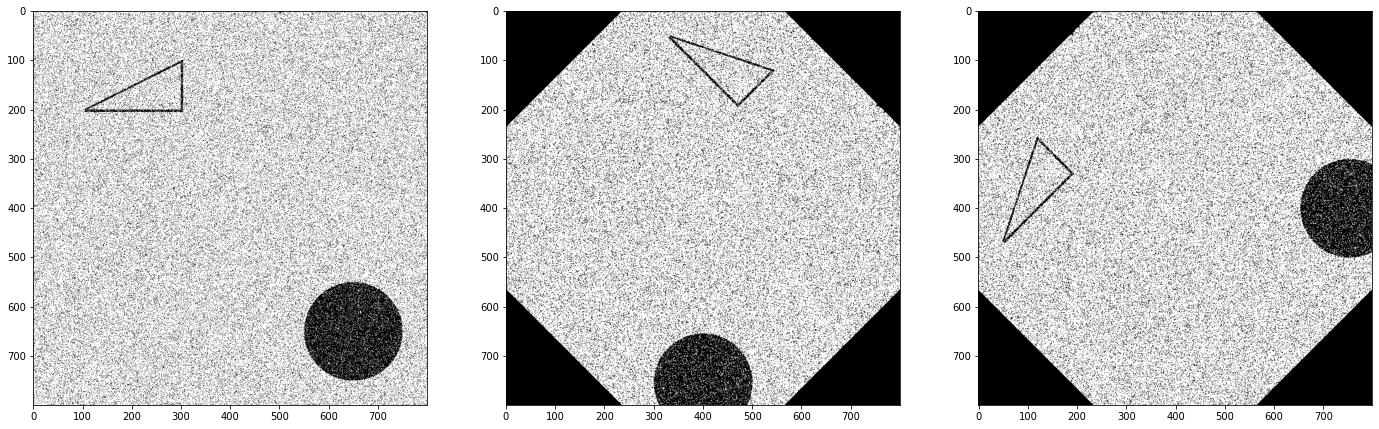

In [59]:
plt.figure(figsize=(24, 8))
plt.subplot(1, 3, 1)
plt.imshow(obj2, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(obj2_rot1, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(obj2_rot2, cmap='gray')
plt.show()

11. Выбрать любое изображений фона.
12. Вырезать из изображения фона любой участок размером 800×800 пикселей.
13. Уменьшить яркость вырезанного фона в 4 раза.

In [60]:
img = cv2.imread('/content/drive/MyDrive/anime.jpeg', cv2.IMREAD_GRAYSCALE)
img = np.array(img, dtype=np.uint8)

img = img[0:800, 0:800]
for y in range(800):
  for x in range(800):
    img[x, y] = int(img[x, y]/4)

197


14. Сформировать новое полутоновое изображение из вырезанного фона
с уменьшенной яркостью, 2-х объектов и добавить на изображение шум в соответствии с вариантом индивидуального задания.

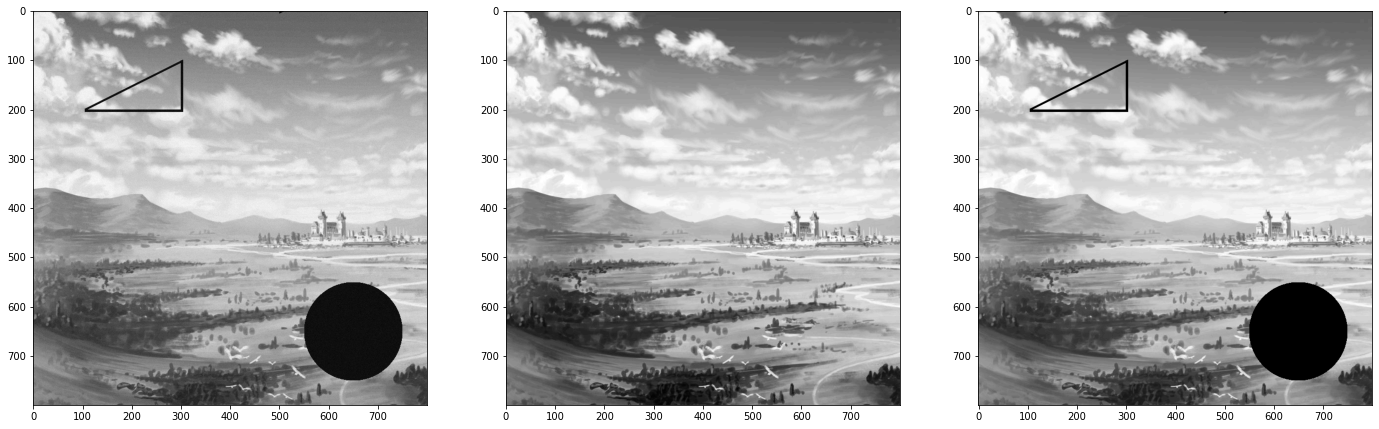

In [61]:
plt.figure(figsize=(24, 8))
new_img = img  * ((obj3)/255)
plt.subplot(1, 3, 3)
plt.imshow(new_img, cmap = 'gray')
new_img = np.array(new_img, dtype=np.uint8)
new_img = new_img + gauss


plt.subplot(1, 3, 1)
plt.imshow(new_img, cmap = 'gray')
plt.subplot(1, 3, 2)
plt.imshow(img, cmap = 'gray')
plt.show()

15. Выполнить операцию «Негатив» для синтезированного изображения.

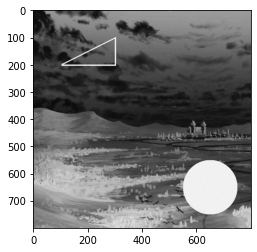

In [62]:
neg_img = gray_negative = abs(255-new_img)
plt.imshow(neg_img, cmap = 'gray')
plt.show()

16. Сформировать новое полутоновое изображение из вырезанного фона с уменьшенной яркостью, одного объекта и добавить на изображение шум в соответствии с вариантом индивидуального задания.
17. Выполнить операцию разности двух изображений, полученных в пп. 14 и 16.

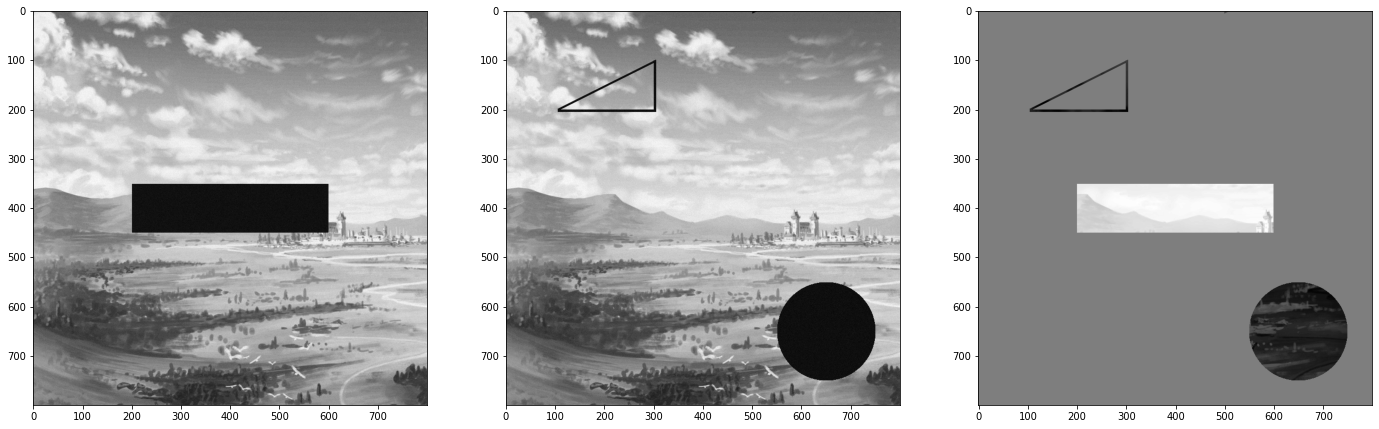

In [63]:
plt.figure(figsize=(24, 8))

new_img_2 = img  * obj1/255 + gauss
plt.subplot(1, 3, 1)
plt.imshow(new_img_2, cmap = 'gray')

new_img_3 = new_img - new_img_2

plt.subplot(1, 3, 2)
plt.imshow(new_img, cmap = 'gray')
plt.subplot(1, 3, 3)
plt.imshow(new_img_3, cmap = 'gray')
plt.show()